In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import requests
import time
from datetime import datetime

from config import g_key
url = 'https://www.googleapis.com/youtube/v3/videos?id=TajZ3_uqlbU&key='+g_key+'&part=snippet,contentDetails,statistics,status'

from citipy import citipy

import timeit

In [2]:
# Read csv files with urls for videos with pandas. File 2 does not contain outlier data.
videos = pd.read_csv('ConnorDawg.csv')
videos2 = pd.read_csv('ConnorDawg2.csv')

# Create a video list 
videos_list = []
videos_list = videos['Videos'].tolist()

# Create a video list without the outlier video (3.6M views)
videos_list2 = []
videos_list2 = videos2['Videos'].tolist()

In [3]:
# For each video request json and store value of viewCount into variable,
# append to view_counts list
view_counts = []
for u_key in videos_list:
    url = 'https://www.googleapis.com/youtube/v3/videos?id='+u_key+'&key='+g_key+'&part=snippet,contentDetails,statistics,status'
    video_response = requests.get(url)
    video_json = video_response.json()
    try:
        counts = video_json['items'][0]['statistics']['viewCount']
        counts = int(counts)
    except KeyError:
        continue
    view_counts.append(counts)  
print(view_counts)

[288392, 779190, 398367, 340920, 814070, 367319, 950696, 284266, 677695, 288940, 602452, 369309, 283442, 295755, 313442, 605388, 231117, 432188, 288993, 443689, 426388, 345633, 432453, 255436, 300369, 1566998, 232274, 1697899, 511369, 225091, 130755, 265637, 483665, 303718, 256070, 149133, 864386, 283127, 1173422, 256474, 378525, 933621, 857707, 192954, 239782, 223772, 1031078, 297460, 425246, 191574, 270567, 986319, 216711, 1390580, 685157, 593635, 591348, 752836, 224302, 965158, 479230, 622223, 301064, 536639, 308714, 3437010, 309597, 796532, 445960, 989876, 248835, 1337766, 365779, 1500812, 909153, 1873291, 646612, 703423, 687833, 622582, 592634, 243598, 253162, 640345, 257887, 444234, 407349, 250646, 251626, 605239, 329315, 1415963, 464679, 407996, 322547, 937497, 250031, 548908, 264115, 521028, 1193588, 261695, 964302, 538264, 396607, 599695, 1323589, 649385, 364717, 871620, 447333, 333383, 492512, 834787, 728225, 711569, 1088983, 1157616, 202295, 465475, 679172, 416690, 868166, 4

In [4]:
# For each video request json and store value of viewCount into variable,
# append to view_counts list
view_counts2 = []
for u_key in videos_list2:
    url = 'https://www.googleapis.com/youtube/v3/videos?id='+u_key+'&key='+g_key+'&part=snippet,contentDetails,statistics,status'
    video_response = requests.get(url)
    video_json = video_response.json()
    try:
        counts2 = video_json['items'][0]['statistics']['viewCount']
        counts2 = int(counts2)
    except KeyError:
        continue
    view_counts2.append(counts2)  
print(view_counts2)

[288392, 779190, 398367, 340920, 814070, 367319, 950696, 284266, 677695, 288940, 602452, 369309, 283442, 295755, 313442, 605388, 231117, 432188, 288993, 443689, 426388, 345633, 432453, 255436, 300369, 1566998, 232274, 1697899, 511369, 225091, 130755, 265637, 483665, 303718, 256070, 149133, 864386, 283127, 1173422, 256474, 378525, 933621, 857707, 192954, 239782, 223772, 1031078, 297460, 425246, 191574, 270567, 986320, 216711, 1390580, 685157, 593635, 591348, 752836, 224302, 965158, 479230, 622223, 301064, 536639, 308714, 309597, 796532, 445960, 989876, 248835, 1337766, 365779, 1500812, 909153, 1873291, 646612, 703423, 687833, 622582, 592634, 243598, 253162, 640345, 257887, 444234, 407349, 250646, 251626, 605239, 329315, 1415967, 464679, 407996, 322547, 937497, 250032, 548908, 264115, 521028, 1193588, 261695, 964302, 538264, 396607, 599695, 1323589, 649385, 364717, 871621, 447333, 333383, 492512, 834788, 728225, 711570, 1088983, 1157616, 202295, 465475, 679172, 416690, 868166, 447619, 43

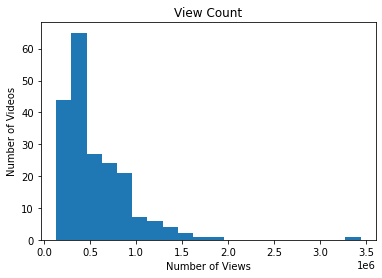

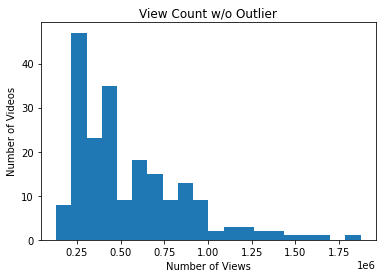

In [7]:
# Show distribution of viewCounts with Histograms
plt.hist(view_counts, bins = 20)
plt.title('View Count')
plt.xlabel('Number of Views')
plt.ylabel('Number of Videos')
plt.show()

plt.hist(view_counts2,bins = 20)
plt.title('View Count w/o Outlier')
plt.xlabel('Number of Views')
plt.ylabel('Number of Videos')
plt.show()

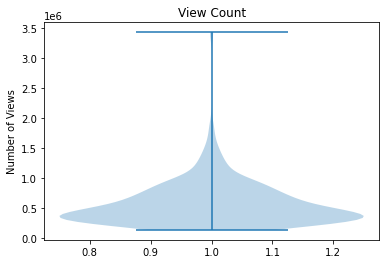

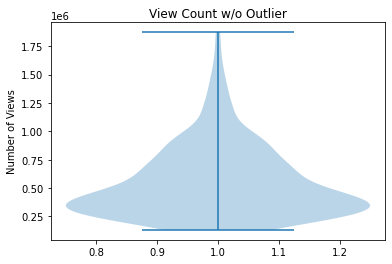

In [8]:
# Show distribution of viewCounts with violin plots.
plt.violinplot(view_counts)
plt.title('View Count')
plt.ylabel('Number of Views')
plt.show()
plt.violinplot(view_counts2)
plt.title('View Count w/o Outlier')
plt.ylabel('Number of Views')
plt.show()

In [104]:
# Show summary statistics for ConnorDawg's viewCounts with and w/o outlier.
s1 = pd.Series(view_counts)
print(s1.describe())
s2 = pd.Series(view_counts2)
s2.describe()

count    2.030000e+02
mean     5.685083e+05
std      3.786754e+05
min      1.307550e+05
25%      3.024965e+05
50%      4.354010e+05
75%      7.079965e+05
max      3.436982e+06
dtype: float64


count    2.020000e+02
mean     5.543094e+05
std      3.208877e+05
min      1.307550e+05
25%      3.024715e+05
50%      4.354010e+05
75%      7.044310e+05
max      1.873274e+06
dtype: float64